In [1]:
import tensorflow as tf
import numpy as np
import pickle

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_13_3.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)

x_train = input_data[:100000,:]
x_valid = input_data[100000:102500, :]
x_test = input_data[102500:,:]



(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_13_3.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:100000,:]
y_valid = output_data[100000:102500, :]
y_test = output_data[102500:,:]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2,validation_data = (x_valid, y_valid))


Train on 100000 samples, validate on 2500 samples
Epoch 1/100
100000/100000 - 5s - loss: 0.2991 - accuracy: 0.8774 - val_loss: 0.2150 - val_accuracy: 0.9091
Epoch 2/100
100000/100000 - 4s - loss: 0.2021 - accuracy: 0.9129 - val_loss: 0.1933 - val_accuracy: 0.9147
Epoch 3/100
100000/100000 - 4s - loss: 0.1872 - accuracy: 0.9167 - val_loss: 0.1859 - val_accuracy: 0.9172
Epoch 4/100
100000/100000 - 4s - loss: 0.1777 - accuracy: 0.9201 - val_loss: 0.1755 - val_accuracy: 0.9212
Epoch 5/100
100000/100000 - 4s - loss: 0.1657 - accuracy: 0.9257 - val_loss: 0.1630 - val_accuracy: 0.9266
Epoch 6/100
100000/100000 - 4s - loss: 0.1468 - accuracy: 0.9335 - val_loss: 0.1409 - val_accuracy: 0.9350
Epoch 7/100
100000/100000 - 4s - loss: 0.1267 - accuracy: 0.9407 - val_loss: 0.1267 - val_accuracy: 0.9388
Epoch 8/100
100000/100000 - 4s - loss: 0.1135 - accuracy: 0.9458 - val_loss: 0.1163 - val_accuracy: 0.9421
Epoch 9/100
100000/100000 - 4s - loss: 0.1033 - accuracy: 0.9504 - val_loss: 0.1057 - val_accu

Epoch 77/100
100000/100000 - 5s - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.0585 - val_accuracy: 0.9844
Epoch 78/100
100000/100000 - 4s - loss: 0.0157 - accuracy: 0.9943 - val_loss: 0.0527 - val_accuracy: 0.9862
Epoch 79/100
100000/100000 - 4s - loss: 0.0146 - accuracy: 0.9947 - val_loss: 0.0639 - val_accuracy: 0.9844
Epoch 80/100
100000/100000 - 5s - loss: 0.0134 - accuracy: 0.9952 - val_loss: 0.0515 - val_accuracy: 0.9872
Epoch 81/100
100000/100000 - 4s - loss: 0.0152 - accuracy: 0.9947 - val_loss: 0.0559 - val_accuracy: 0.9868
Epoch 82/100
100000/100000 - 4s - loss: 0.0136 - accuracy: 0.9952 - val_loss: 0.0555 - val_accuracy: 0.9865
Epoch 83/100
100000/100000 - 4s - loss: 0.0135 - accuracy: 0.9951 - val_loss: 0.0579 - val_accuracy: 0.9859
Epoch 84/100
100000/100000 - 4s - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.0527 - val_accuracy: 0.9877
Epoch 85/100
100000/100000 - 4s - loss: 0.0116 - accuracy: 0.9958 - val_loss: 0.0553 - val_accuracy: 0.9864
Epoch 86/100
100000/100000 -

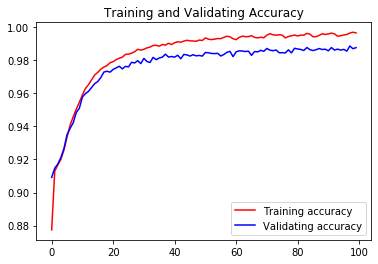

In [7]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()
plt.show()

In [5]:
model.evaluate(x_test, y_test, verbose = 2)

2500/1 - 0s - loss: 0.0355 - accuracy: 0.9855


[0.07090053370000728, 0.9854667]

In [8]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_13_3_model.h5')